# Question 4 [Marks 80]
Student Attendance Dashboard for Decision Making. You will be given a
Google Sheet with different sheets holding data of different classes. Create
a dashboard showing a summary of what's happening across different
classes. Which students need attention for missing sessions? Which

students are unsatisfied? Which students are very satisfied? <Date>
Column shows attendance. R-<Date> Column shows the rating by the
candidate. Extra marks for identifying more useful insights. Missing values
of the Type column can be treated as STUDENT. This data gets updated on
a daily basis. The latest data gets injected in early columns. Your code
shouldn't need any changes to deal with the latest data. Please note:
Visualisation is mandatory. You will receive 0 marks if you do not add
visualisation. Data Link -
https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2
MJzpFA6t0AsBMi8/edit?usp=sharing

# Import the necessary libraries

In [1]:
#install lib
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
url = 'https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8/edit?usp=sharing'

In [2]:
sheet_id_1='1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8'
sheet_id_2='1zz8dedYx-9wVX64rNDuG7VZFx-aLeu7lDlL0BcjF5sw'
sheet_name_1='Class1'
sheet_name_2='Class2'
class_1=pd.read_csv("https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id_1,sheet_name_1))
class_2=pd.read_csv("https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id_2,sheet_name_2))

In [3]:
class_1.shape

(57, 35)

In [4]:
class_2.shape

(70, 20)

In [5]:
# class-1
class_1.set_index('Unnamed: 0',inplace=True)
class_1.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,9,Missed,6,Missed,6,Missed,7,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Missed,10,Missed,8,Missed,8,Attended,9,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STUDENT,Missed,8,Missed,10,Missed,10,Missed,9,Attended,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STUDENT,Missed,10,Missed,10,Attended,10,Missed,8,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,WORKING,Missed,6,Missed,7,Missed,5,Missed,9,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#class-2
class_2.set_index('Unnamed: 0',inplace=True)
class_2.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,Unnamed: 11,05-01-21,Unnamed: 13,04-01-21,Unnamed: 15,03-01-21,Unnamed: 17,01-01-21,R-01-01-21
Unnamed: 0,,,,,,,,,,,,,,,,,,,
1,NaN,Attended,9,Attended,6,Attended,7,Attended,9,Attended,5,Attended,9,Attended,8,Missed,8,NaN,NaN
2,NaN,Attended,7,Attended,9,Attended,5,Attended,9,Attended,8,Attended,7,Attended,7,Attended,10,NaN,NaN
3,STUDENT,Missed,5,Missed,8,Missed,6,Missed,8,Missed,6,Missed,10,Missed,9,Missed,10,NaN,NaN
4,NaN,Attended,8,Attended,8,Attended,9,Attended,8,Missed,10,Missed,7,Attended,9,Attended,7,NaN,NaN
5,WORKING,Attended,8,Attended,9,Attended,10,Missed,7,Missed,10,Missed,5,Missed,6,Missed,10,NaN,NaN


In [7]:
df1=class_1
df2=class_2

In [8]:
df1['Type']=df1['Type'].fillna(value='STUDENT')
df2['Type']=df2['Type'].fillna(value='STUDENT')

# Class_1

In [9]:
df1=df1.iloc[:,:21]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 57
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         57 non-null     object
 1   10-01-21     57 non-null     object
 2   Unnamed: 3   57 non-null     int64 
 3   09-01-21     57 non-null     object
 4   Unnamed: 5   57 non-null     int64 
 5   08-01-21     57 non-null     object
 6   Unnamed: 7   57 non-null     int64 
 7   07-01-21     56 non-null     object
 8   Unnamed: 9   57 non-null     int64 
 9   06-01-21     56 non-null     object
 10  Unnamed: 11  57 non-null     int64 
 11  05-01-21     56 non-null     object
 12  Unnamed: 13  57 non-null     int64 
 13  04-01-21     56 non-null     object
 14  Unnamed: 15  57 non-null     int64 
 15  03-01-21     56 non-null     object
 16  Unnamed: 17  57 non-null     int64 
 17  02-01-21     56 non-null     object
 18  Unnamed: 19  57 non-null     int64 
 19  01-01-21     56 non-null     ob

In [10]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 57
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         56 non-null     object
 1   10-01-21     56 non-null     object
 2   Unnamed: 3   56 non-null     int64 
 3   09-01-21     56 non-null     object
 4   Unnamed: 5   56 non-null     int64 
 5   08-01-21     56 non-null     object
 6   Unnamed: 7   56 non-null     int64 
 7   07-01-21     56 non-null     object
 8   Unnamed: 9   56 non-null     int64 
 9   06-01-21     56 non-null     object
 10  Unnamed: 11  56 non-null     int64 
 11  05-01-21     56 non-null     object
 12  Unnamed: 13  56 non-null     int64 
 13  04-01-21     56 non-null     object
 14  Unnamed: 15  56 non-null     int64 
 15  03-01-21     56 non-null     object
 16  Unnamed: 17  56 non-null     int64 
 17  02-01-21     56 non-null     object
 18  Unnamed: 19  56 non-null     int64 
 19  01-01-21     56 non-null     ob

In [11]:
df1.iloc[2,:][1:].value_counts()

Missed      6
Attended    4
10          3
7           3
8           1
9           1
6           1
5           1
Name: 3, dtype: int64

In [12]:
df1['Missed']=0
df1['Attended']=0

In [13]:
for i in df1.index:
    temp=df1.loc[i,:][1:].value_counts()
    if 'Missed' in temp:
        df1.loc[i,'Missed']=temp['Missed']
    if 'Attended' in temp:
        df1.loc[i,'Attended']=temp['Attended']
df1.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,...,04-01-21,Unnamed: 15,03-01-21,Unnamed: 17,02-01-21,Unnamed: 19,01-01-21,Unnamed: 21,Missed,Attended
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,9,Missed,6,Missed,6,Missed,7,Missed,...,Missed,6,Missed,9,Missed,6,Missed,7,10,0
2,STUDENT,Missed,10,Missed,8,Missed,8,Attended,9,Missed,...,Attended,10,Missed,8,Attended,6,Missed,10,6,4
3,STUDENT,Missed,8,Missed,10,Missed,10,Missed,9,Attended,...,Missed,7,Missed,10,Attended,7,Attended,5,6,4
4,STUDENT,Missed,10,Missed,10,Attended,10,Missed,8,Missed,...,Attended,6,Attended,9,Attended,6,Attended,6,5,5
5,WORKING,Missed,6,Missed,7,Missed,5,Missed,9,Missed,...,Missed,8,Missed,9,Missed,8,Missed,10,10,0


In [14]:
#define '%missed' column
df1['%missed']=(df1['Missed']*100)/(df1['Missed']+df1['Attended'])

In [15]:
df1['%missed'].describe()

count     56.000000
mean      48.750000
std       41.387855
min        0.000000
25%       10.000000
50%       45.000000
75%      100.000000
max      100.000000
Name: %missed, dtype: float64

# Student Need attendance 

In [16]:
#set the threshold at 25%
df1['need_attendance_related_attension']=False
for i in df1.index:
    if df1.loc[i,'%missed']<25:
        df1['need_attendance_related_attension']=True

# Student Need attendance Data Visualization

<Axes: >

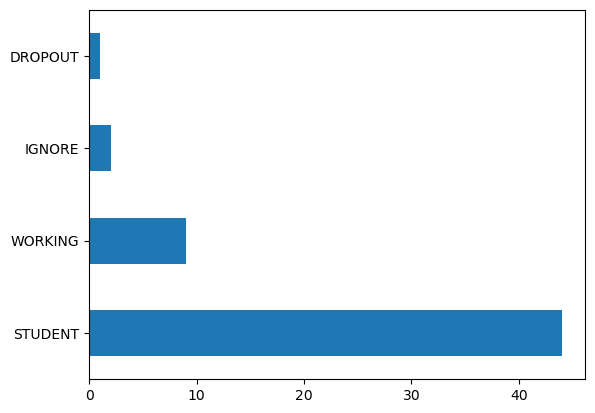

In [17]:
need_attention_student_list_1=df1[df1['need_attendance_related_attension']==True].index
need_attention_student_list_1

df1.loc[need_attention_student_list_1,'Type'].value_counts().plot(kind='barh')

In [18]:
df1.iloc[1,2::2].index[:-3]

Index(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11',
       'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19'],
      dtype='object')

In [19]:
#rating analysis
df1['avg_rating']=0
for i in df1.index:
    df1.loc[i,'avg_rating']=df1.loc[i,df1.iloc[1,2::2].index[:-3]][:-2].mean()

In [20]:
df1['avg_rating'].describe()

count    56.000000
mean      7.617347
std       0.718743
min       6.000000
25%       7.107143
50%       7.714286
75%       8.142857
max       9.142857
Name: avg_rating, dtype: float64

In [21]:
#above 7 average rating shows satisfaction
df1['satisfied']=(df1['avg_rating']>=7)

# Student are satisfied and unsatisfied

In [22]:
student_satisfied_1=df1[df1['satisfied']==True].index
student_unsatisfied_1=df1[df1['satisfied']==False].index
print('no of satisfied students = {}'.format(len(student_satisfied_1)))
print('no of unsatisfied students = {}'.format(len(student_unsatisfied_1)))

no of satisfied students = 48
no of unsatisfied students = 8


# # Student are satisfied and unsatisfied Data Visualization

<Axes: >

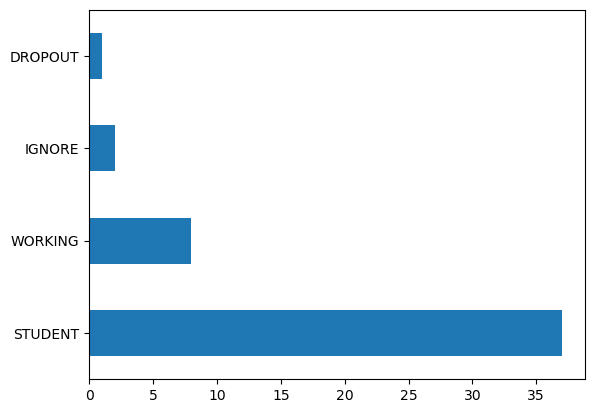

In [23]:
df1.loc[student_satisfied_1,'Type'].value_counts().plot(kind='barh')

<Axes: >

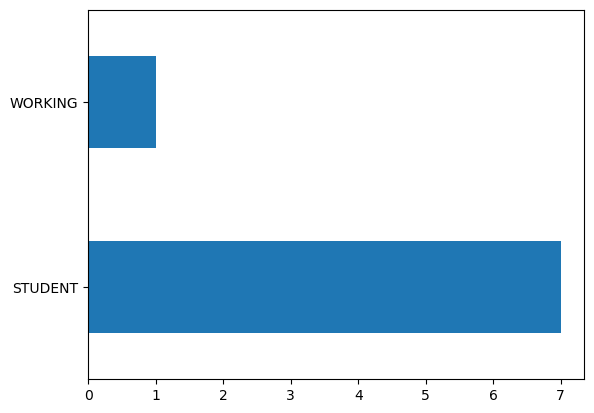

In [24]:
df1.loc[student_unsatisfied_1,'Type'].value_counts().plot(kind='barh')

# Class 2

In [25]:
df2=df2.iloc[:,:-2]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 70
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         70 non-null     object
 1   10-01-21     70 non-null     object
 2   Unnamed: 3   70 non-null     int64 
 3   09-01-21     70 non-null     object
 4   Unnamed: 5   70 non-null     int64 
 5   08-01-21     70 non-null     object
 6   Unnamed: 7   70 non-null     int64 
 7   07-01-21     69 non-null     object
 8   Unnamed: 9   70 non-null     int64 
 9   06-01-21     69 non-null     object
 10  Unnamed: 11  70 non-null     int64 
 11  05-01-21     69 non-null     object
 12  Unnamed: 13  70 non-null     int64 
 13  04-01-21     69 non-null     object
 14  Unnamed: 15  70 non-null     int64 
 15  03-01-21     67 non-null     object
 16  Unnamed: 17  70 non-null     int64 
dtypes: int64(8), object(9)
memory usage: 9.8+ KB


In [26]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 1 to 70
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         67 non-null     object
 1   10-01-21     67 non-null     object
 2   Unnamed: 3   67 non-null     int64 
 3   09-01-21     67 non-null     object
 4   Unnamed: 5   67 non-null     int64 
 5   08-01-21     67 non-null     object
 6   Unnamed: 7   67 non-null     int64 
 7   07-01-21     67 non-null     object
 8   Unnamed: 9   67 non-null     int64 
 9   06-01-21     67 non-null     object
 10  Unnamed: 11  67 non-null     int64 
 11  05-01-21     67 non-null     object
 12  Unnamed: 13  67 non-null     int64 
 13  04-01-21     67 non-null     object
 14  Unnamed: 15  67 non-null     int64 
 15  03-01-21     67 non-null     object
 16  Unnamed: 17  67 non-null     int64 
dtypes: int64(8), object(9)
memory usage: 9.4+ KB


In [27]:
df2['Missed']=0
df2['Attended']=0

In [28]:
for i in df2.index:
    temp=df2.loc[i,:][1:].value_counts()
    if 'Missed' in temp:
        df2.loc[i,'Missed']=temp['Missed']
    if 'Attended' in temp:
        df2.loc[i,'Attended']=temp['Attended']
df2.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,Unnamed: 11,05-01-21,Unnamed: 13,04-01-21,Unnamed: 15,03-01-21,Unnamed: 17,Missed,Attended
Unnamed: 0,,,,,,,,,,,,,,,,,,,
1,STUDENT,Attended,9,Attended,6,Attended,7,Attended,9,Attended,5,Attended,9,Attended,8,Missed,8,1,7
2,STUDENT,Attended,7,Attended,9,Attended,5,Attended,9,Attended,8,Attended,7,Attended,7,Attended,10,0,8
3,STUDENT,Missed,5,Missed,8,Missed,6,Missed,8,Missed,6,Missed,10,Missed,9,Missed,10,8,0
4,STUDENT,Attended,8,Attended,8,Attended,9,Attended,8,Missed,10,Missed,7,Attended,9,Attended,7,2,6
5,WORKING,Attended,8,Attended,9,Attended,10,Missed,7,Missed,10,Missed,5,Missed,6,Missed,10,5,3


In [29]:
#define '%missed' column
df2['%missed']=(df2['Missed']*100)/(df2['Missed']+df2['Attended'])
df2['%missed'].describe()

count     67.000000
mean      41.231343
std       41.743202
min        0.000000
25%        0.000000
50%       25.000000
75%      100.000000
max      100.000000
Name: %missed, dtype: float64

# Student Need attendance

In [30]:
#set the threshold at 25%
df2['need_attendance_related_attension']=False
for i in df2.index:
    if df2.loc[i,'%missed']<25:
        df2['need_attendance_related_attension']=True

# Student Need attendance Data Visualization

<Axes: >

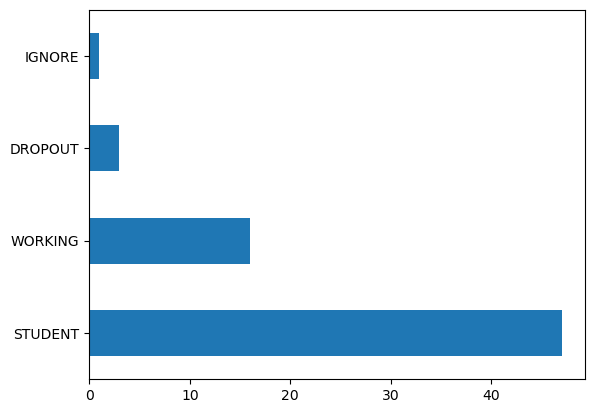

In [31]:
need_attention_student_list=df2[df2['need_attendance_related_attension']==True].index
need_attention_student_list
df2.loc[need_attention_student_list,'Type'].value_counts().plot(kind='barh')

In [32]:
df2['avg_rating']=0
for i in df2.index:
    df2.loc[i,'avg_rating']=df2.loc[i,df2.iloc[1,2::2].index[:-3]][:-2].mean()

In [33]:
df2['avg_rating'].describe()

count    67.000000
mean      7.653731
std       0.730780
min       5.800000
25%       7.200000
50%       7.600000
75%       8.200000
max       9.000000
Name: avg_rating, dtype: float64

In [34]:
#above 7 average rating shows satisfaction

df2['satisfied']=(df2['avg_rating']>=7)

# Student are satisfied and unsatisfied

In [35]:
student_satisfied_2=df2[df2['satisfied']==True].index
student_unsatisfied_2=df2[df2['satisfied']==False].index
print(" ")
print("Below we will get to know how many students are satisfied and how many students are unsatisfied")
print('Number of satisfied students= {}'.format(len(student_satisfied_2)))
print('Number of unsatisfied students= {}'.format(len(student_unsatisfied_2)))

 
Below we will get to know how many students are satisfied and how many students are unsatisfied
Number of satisfied students= 58
Number of unsatisfied students= 9


# Student are satisfied and unsatisfied Data Visualization

<Axes: >

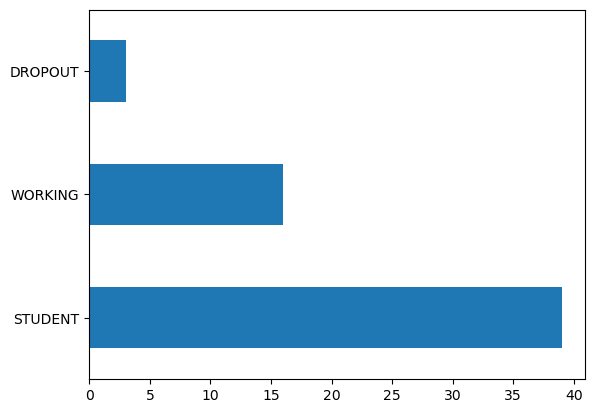

In [36]:
df2.loc[student_satisfied_2,'Type'].value_counts().plot(kind='barh')

<Axes: >

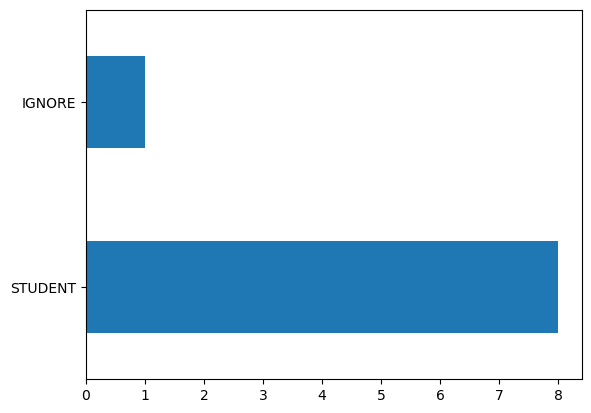

In [37]:
df2.loc[student_unsatisfied_2,'Type'].value_counts().plot(kind='barh')